In [1]:
# paquetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.linear_model import LinearRegression
import seaborn as sns

%matplotlib inline

In [2]:
school_data = pd.read_csv('Connect.csv', sep = ',')
school_data.head(5)

C:\Users\cocta\AppData\Local\Temp\ipykernel_29152\1891978422.py:1: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  school_data = pd.read_csv('Connect.csv', sep = ',')


,esp_Nombre,alu_NumControl,ret_ID,ret_ClaveOficial,car_Calif,Aprueba,car_UltOpcAcred,car_SemXPrime,per_ID_PerXPri,car_AnioXPrime,...,car_AnioXTerc,Periodo,Periodo.1,Unnamed: 18,OPCION DE ACREDITACION,Unnamed: 20,OPCION DE ACREDITACION.1,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,INGENIERÍA EN SISTEMAS COMPUTACIONALES,6030012,2,SCV0407,99,Si,1,1,1,2006,...,0,2006B,2006B,Ord. Primera Oportunidad,Ord. Primera Oportunidad,0.0,Ord. Primera Oportunidad,NaN,NaN,0.0
1,INGENIERÍA EN SISTEMAS COMPUTACIONALES,6030012,11,SCC0428,95,Si,4,1,1,2006,...,0,2007B,2007B,Rep. Primera Oportunidad,Rep. Primera Oportunidad,1.0,Ord. Primera Oportunidad,NaN,NaN,NaN
2,INGENIERÍA EN SISTEMAS COMPUTACIONALES,6030012,4,SCB0421,94,Si,1,1,1,2006,...,0,2006B,2006B,Ord. Primera Oportunidad,Ord. Primera Oportunidad,2.0,Ord. Segunda Oportunidad,NaN,NaN,NaN
3,INGENIERÍA EN SISTEMAS COMPUTACIONALES,6030012,5,ACM0403,99,Si,1,1,1,2006,...,0,2006B,2006B,Ord. Primera Oportunidad,Ord. Primera Oportunidad,3.0,Ord. Segunda Oportunidad,NaN,NaN,NaN
4,INGENIERÍA EN SISTEMAS COMPUTACIONALES,6030012,8,SCE0418,96,Si,1,1,1,2006,...,0,2006B,2006B,Ord. Primera Oportunidad,Ord. Primera Oportunidad,4.0,Rep. Primera Oportunidad,NaN,NaN,NaN


In [13]:
# OBTENCIÓN DE VARIABLES DUMMY POR CARRERA

dummy_carrera = pd.get_dummies(school_data["esp_Nombre"], prefix = "dummy").iloc[:,1:]

In [14]:
dummy_carrera

,dummy_INGENIERÍA ELECTRÓNICA,dummy_INGENIERÍA EN ANIMACIÓN DIGITAL Y EFECTOS VISUALES,dummy_INGENIERÍA EN SISTEMAS COMPUTACIONALES,dummy_INGENIERÍA INDUSTRIAL,dummy_INGENIERÍA MECATRÓNICA,dummy_LICENCIATURA EN ADMINISTRACIÓN,dummy_LICENCIATURA EN GASTRONOMIA
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
116037,0,0,0,1,0,0,0
116038,0,0,0,1,0,0,0
116039,0,0,0,1,0,0,0
116040,0,0,0,1,0,0,0


In [16]:
column_names = school_data.columns.values.tolist()
data_school = school_data[column_names].join(dummy_carrera)
column_names = data_school.columns.values.tolist()
data_school.head()

,esp_Nombre,alu_NumControl,ret_ID,ret_ClaveOficial,car_Calif,Aprueba,car_UltOpcAcred,car_SemXPrime,per_ID_PerXPri,car_AnioXPrime,...,Unnamed: 22,Unnamed: 23,Unnamed: 24,dummy_INGENIERÍA ELECTRÓNICA,dummy_INGENIERÍA EN ANIMACIÓN DIGITAL Y EFECTOS VISUALES,dummy_INGENIERÍA EN SISTEMAS COMPUTACIONALES,dummy_INGENIERÍA INDUSTRIAL,dummy_INGENIERÍA MECATRÓNICA,dummy_LICENCIATURA EN ADMINISTRACIÓN,dummy_LICENCIATURA EN GASTRONOMIA
0,INGENIERÍA EN SISTEMAS COMPUTACIONALES,6030012,2,SCV0407,99,Si,1,1,1,2006,...,NaN,NaN,0.0,0,0,1,0,0,0,0
1,INGENIERÍA EN SISTEMAS COMPUTACIONALES,6030012,11,SCC0428,95,Si,4,1,1,2006,...,NaN,NaN,NaN,0,0,1,0,0,0,0
2,INGENIERÍA EN SISTEMAS COMPUTACIONALES,6030012,4,SCB0421,94,Si,1,1,1,2006,...,NaN,NaN,NaN,0,0,1,0,0,0,0
3,INGENIERÍA EN SISTEMAS COMPUTACIONALES,6030012,5,ACM0403,99,Si,1,1,1,2006,...,NaN,NaN,NaN,0,0,1,0,0,0,0
4,INGENIERÍA EN SISTEMAS COMPUTACIONALES,6030012,8,SCE0418,96,Si,1,1,1,2006,...,NaN,NaN,NaN,0,0,1,0,0,0,0


In [21]:
variable_predict = ["dummy_INGENIERÍA ELECTRÓNICA", "dummy_INGENIERÍA EN ANIMACIÓN DIGITAL Y EFECTOS VISUALES",
                    "dummy_INGENIERÍA EN SISTEMAS COMPUTACIONALES", "dummy_INGENIERÍA INDUSTRIAL", 
                    "dummy_INGENIERÍA MECATRÓNICA", "dummy_LICENCIATURA EN ADMINISTRACIÓN","dummy_LICENCIATURA EN GASTRONOMIA"]

In [22]:
# DEFINICIÓN DE VARIABLES, DEPENDIENTE E INDEPENDIENTES
X = data_school[variable_predict]

Y = data_school["car_Calif"]

In [23]:
lm = LinearRegression() # crea el modelo y luego ponemos sus parametros
model = lm.fit(X,Y)

In [24]:
print(lm.intercept_)
print(lm.coef_)

86.42865649423145
[-6.49051639 -8.29979792 -4.72777661 -3.04732867 -4.75371293  0.50270189
 -6.44983238]


In [25]:
# Juntamos estos coeficientes con sus variables categóricas

list(zip(variable_predict,lm.coef_))

[('dummy_INGENIERÍA ELECTRÓNICA', -6.490516387717623),
 ('dummy_INGENIERÍA EN ANIMACIÓN DIGITAL Y EFECTOS VISUALES',
  -8.299797915623778),
 ('dummy_INGENIERÍA EN SISTEMAS COMPUTACIONALES', -4.727776612079931),
 ('dummy_INGENIERÍA INDUSTRIAL', -3.0473286674371782),
 ('dummy_INGENIERÍA MECATRÓNICA', -4.753712927640032),
 ('dummy_LICENCIATURA EN ADMINISTRACIÓN', 0.5027018872714256),
 ('dummy_LICENCIATURA EN GASTRONOMIA', -6.449832378636132)]

In [26]:
lm.score(X,Y)

0.011100075781701024

In [35]:
# ahora la desviacion tipica de los residuos
data_school["prediction"] = 86.42865649423145 - data_school["dummy_INGENIERÍA ELECTRÓNICA"]*6.490516387717623 
- data_school["dummy_INGENIERÍA EN ANIMACIÓN DIGITAL Y EFECTOS VISUALES"]*8.299797915623778
- data_school['dummy_INGENIERÍA EN SISTEMAS COMPUTACIONALES']*4.727776612079931
- data_school['dummy_INGENIERÍA INDUSTRIAL']*3.0473286674371782 - data_school['dummy_INGENIERÍA MECATRÓNICA']*4.753712927640032
+ data_school['dummy_LICENCIATURA EN ADMINISTRACIÓN']*0.5227018872714256 - data_school['dummy_LICENCIATURA EN GASTRONOMIA']*6.449832378636132

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
116037    0.0
116038    0.0
116039    0.0
116040    0.0
116041    0.0
Length: 116042, dtype: float64

In [37]:
data_school.head()

,esp_Nombre,alu_NumControl,ret_ID,ret_ClaveOficial,car_Calif,Aprueba,car_UltOpcAcred,car_SemXPrime,per_ID_PerXPri,car_AnioXPrime,...,Unnamed: 23,Unnamed: 24,dummy_INGENIERÍA ELECTRÓNICA,dummy_INGENIERÍA EN ANIMACIÓN DIGITAL Y EFECTOS VISUALES,dummy_INGENIERÍA EN SISTEMAS COMPUTACIONALES,dummy_INGENIERÍA INDUSTRIAL,dummy_INGENIERÍA MECATRÓNICA,dummy_LICENCIATURA EN ADMINISTRACIÓN,dummy_LICENCIATURA EN GASTRONOMIA,prediction
0,INGENIERÍA EN SISTEMAS COMPUTACIONALES,6030012,2,SCV0407,99,Si,1,1,1,2006,...,NaN,0.0,0,0,1,0,0,0,0,86.428656
1,INGENIERÍA EN SISTEMAS COMPUTACIONALES,6030012,11,SCC0428,95,Si,4,1,1,2006,...,NaN,NaN,0,0,1,0,0,0,0,86.428656
2,INGENIERÍA EN SISTEMAS COMPUTACIONALES,6030012,4,SCB0421,94,Si,1,1,1,2006,...,NaN,NaN,0,0,1,0,0,0,0,86.428656
3,INGENIERÍA EN SISTEMAS COMPUTACIONALES,6030012,5,ACM0403,99,Si,1,1,1,2006,...,NaN,NaN,0,0,1,0,0,0,0,86.428656
4,INGENIERÍA EN SISTEMAS COMPUTACIONALES,6030012,8,SCE0418,96,Si,1,1,1,2006,...,NaN,NaN,0,0,1,0,0,0,0,86.428656


In [40]:
# suma de los cuadrados de las diferencias
SSD = np.sum((data_school["prediction"] - data_school["car_Calif"])**2)
SSD

68095338.91916968

In [52]:
RSE = np.sqrt(SSD/(len(data_school)-len(variable_predict)-7))
RSE

24.225753267490717

In [53]:
calif_mean = np.mean(data_school["car_Calif"])
calif_mean

83.1149152892918

In [54]:
error = RSE/calif_mean
error
# el modelo todavía no explica un 29% coeficiente de variacion

0.2914729947467307

(array([ 8071.,     0.,     0.,     0.,     0.,     0.,  5783., 26132.,
        45490., 30566.]),
 array([-86.42865649, -75.77960486, -65.13055322, -54.48150158,
        -43.83244994, -33.1833983 , -22.53434666, -11.88529502,
         -1.23624338,   9.41280825,  20.06185989]),
 <BarContainer object of 10 artists>)

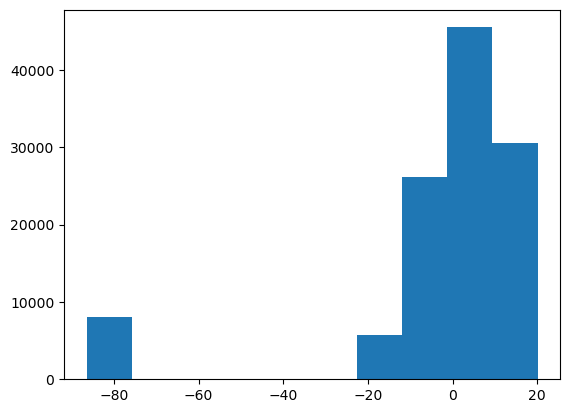

In [57]:
plt.hist(data_school["car_Calif"] - data_school["prediction"]) # es mas o menos una distribución normal

In [50]:
data = data_school[['car_Calif', "dummy_INGENIERÍA ELECTRÓNICA",
                       "dummy_INGENIERÍA EN ANIMACIÓN DIGITAL Y EFECTOS VISUALES", "dummy_INGENIERÍA EN SISTEMAS COMPUTACIONALES",
                       "dummy_INGENIERÍA INDUSTRIAL", "dummy_INGENIERÍA MECATRÓNICA", "dummy_LICENCIATURA EN ADMINISTRACIÓN",
                       "dummy_LICENCIATURA EN GASTRONOMIA"]]
data

,car_Calif,dummy_INGENIERÍA ELECTRÓNICA,dummy_INGENIERÍA EN ANIMACIÓN DIGITAL Y EFECTOS VISUALES,dummy_INGENIERÍA EN SISTEMAS COMPUTACIONALES,dummy_INGENIERÍA INDUSTRIAL,dummy_INGENIERÍA MECATRÓNICA,dummy_LICENCIATURA EN ADMINISTRACIÓN,dummy_LICENCIATURA EN GASTRONOMIA
0,99,0,0,1,0,0,0,0
1,95,0,0,1,0,0,0,0
2,94,0,0,1,0,0,0,0
3,99,0,0,1,0,0,0,0
4,96,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
116037,82,0,0,0,1,0,0,0
116038,78,0,0,0,1,0,0,0
116039,95,0,0,0,1,0,0,0
116040,90,0,0,0,1,0,0,0


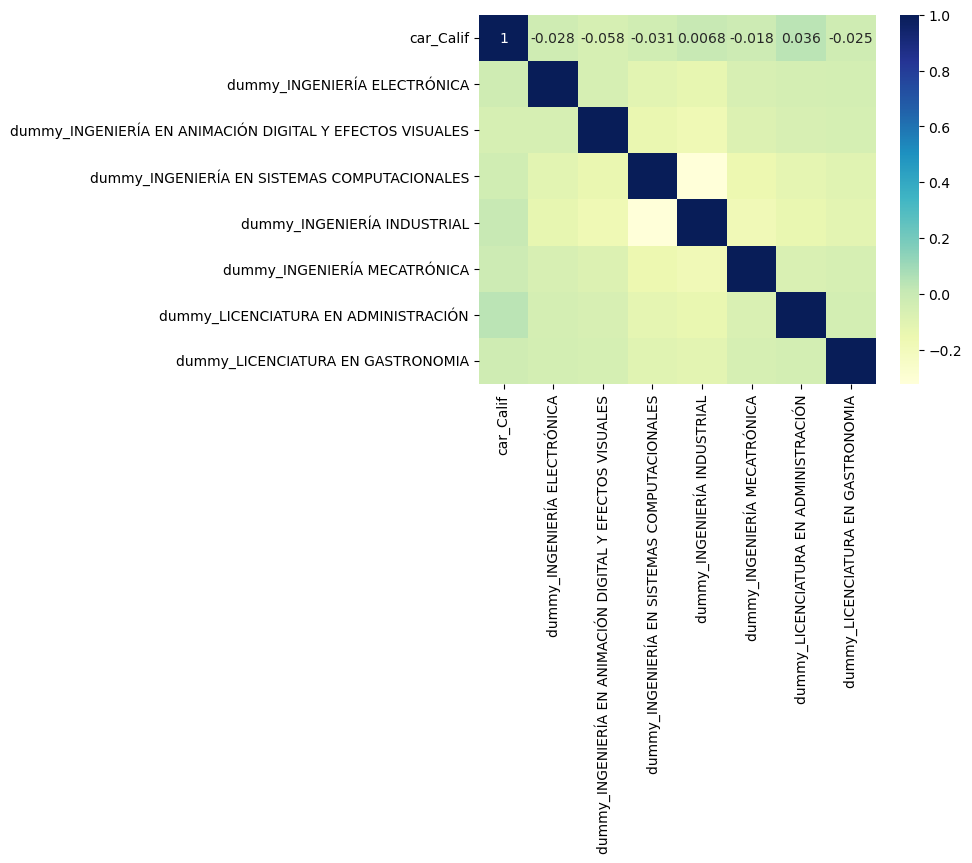

In [51]:
# Se puede hacer una matriz de correlaciones por cada par de variables en una matriz
# se utiliza libreria seaborn

sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [71]:
school_data.esp_Nombre.unique()

array(['INGENIERÍA EN SISTEMAS COMPUTACIONALES', 'INGENIERÍA ELECTRÓNICA',
       'INGENIERÍA INDUSTRIAL',
       'INGENIERÍA EN ANIMACIÓN DIGITAL Y EFECTOS VISUALES',
       'INGENIERIA EN GESTION EMPRESARIAL', 'INGENIERÍA MECATRÓNICA',
       'LICENCIATURA EN ADMINISTRACIÓN', 'LICENCIATURA EN GASTRONOMIA'],
      dtype=object)

In [72]:
school_data.alu_NumControl.unique()

array(['6030012', '6030089', '6030014', ..., '190119592', '190118207',
       '190116827'], dtype=object)

In [73]:
school_data.describe() # Una descripción rápida de los datos

,ret_ID,car_Calif,car_UltOpcAcred,car_SemXPrime,per_ID_PerXPri,car_AnioXPrime,car_SemXSeg,per_ID_PerXSeg,car_AnioXSeg,car_SemXTerc,per_ID_PerXTerc,car_AnioXTerc,Unnamed: 20,Unnamed: 22,Unnamed: 23,Unnamed: 24
count,116042.000000,116042.000000,116042.000000,116042.000000,116042.000000,116042.00000,116042.000000,116042.000000,116042.000000,116042.000000,116042.000000,116042.000000,8.00000,0.0,0.0,1.0
mean,449.366781,83.114915,1.319402,4.149894,1.538745,2014.39453,0.259199,0.067631,85.699178,0.031937,0.006515,8.641139,3.50000,NaN,NaN,0.0
std,204.338448,24.033575,0.884247,2.794099,0.504223,4.33994,1.363646,0.337340,406.722845,0.565705,0.105071,131.756006,2.44949,NaN,NaN,NaN
min,2.000000,0.000000,0.000000,0.000000,1.000000,2000.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,NaN,NaN,0.0
25%,372.000000,82.000000,1.000000,2.000000,1.000000,2011.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.75000,NaN,NaN,0.0
50%,492.000000,90.000000,1.000000,4.000000,2.000000,2015.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.50000,NaN,NaN,0.0
75%,556.000000,96.000000,1.000000,6.000000,2.000000,2018.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.25000,NaN,NaN,0.0
max,877.000000,100.000000,8.000000,99.000000,3.000000,2022.00000,87.000000,3.000000,2021.000000,86.000000,3.000000,2021.000000,7.00000,NaN,NaN,0.0


In [74]:
school_data.columns

Index(['esp_Nombre', 'alu_NumControl', 'ret_ID', 'ret_ClaveOficial',
       'car_Calif', 'Aprueba', 'car_UltOpcAcred', 'car_SemXPrime',
       'per_ID_PerXPri', 'car_AnioXPrime', 'car_SemXSeg', 'per_ID_PerXSeg',
       'car_AnioXSeg', 'car_SemXTerc', 'per_ID_PerXTerc', 'car_AnioXTerc',
       'Periodo', 'Periodo.1', 'Unnamed: 18', 'OPCION DE ACREDITACION',
       'Unnamed: 20', 'OPCION DE ACREDITACION.1', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24'],
      dtype='object')

In [27]:
# OBTENCIÓN DE VARIABLES DUMMY POR CARRERA

dummy_carr = pd.get_dummies(school_data["esp_Nombre"], prefix = "dummy")
print(dummy_carrera)

        dummy_INGENIERÍA ELECTRÓNICA  \
0                                  0   
1                                  0   
2                                  0   
3                                  0   
4                                  0   
...                              ...   
116037                             0   
116038                             0   
116039                             0   
116040                             0   
116041                             0   

        dummy_INGENIERÍA EN ANIMACIÓN DIGITAL Y EFECTOS VISUALES  \
0                                                       0          
1                                                       0          
2                                                       0          
3                                                       0          
4                                                       0          
...                                                   ...          
116037                                     

In [28]:
# ahora tenemos que agregarlas al data frame original
column_names = school_data.columns.values.tolist()
column_names

['esp_Nombre',
 'alu_NumControl',
 'ret_ID',
 'ret_ClaveOficial',
 'car_Calif',
 'Aprueba',
 'car_UltOpcAcred',
 'car_SemXPrime',
 'per_ID_PerXPri',
 'car_AnioXPrime',
 'car_SemXSeg',
 'per_ID_PerXSeg',
 'car_AnioXSeg',
 'car_SemXTerc',
 'per_ID_PerXTerc',
 'car_AnioXTerc',
 'Periodo',
 'Periodo.1',
 'Unnamed: 18',
 'OPCION DE ACREDITACION',
 'Unnamed: 20',
 'OPCION DE ACREDITACION.1',
 'Unnamed: 22',
 'Unnamed: 23',
 'Unnamed: 24']

In [29]:
school_data_new = school_data[column_names].join(dummy_carr)
column_names = school_data_new.columns.values.tolist() # sobreescribimos las columnas
school_data_new.head()


,esp_Nombre,alu_NumControl,ret_ID,ret_ClaveOficial,car_Calif,Aprueba,car_UltOpcAcred,car_SemXPrime,per_ID_PerXPri,car_AnioXPrime,...,Unnamed: 23,Unnamed: 24,dummy_INGENIERIA EN GESTION EMPRESARIAL,dummy_INGENIERÍA ELECTRÓNICA,dummy_INGENIERÍA EN ANIMACIÓN DIGITAL Y EFECTOS VISUALES,dummy_INGENIERÍA EN SISTEMAS COMPUTACIONALES,dummy_INGENIERÍA INDUSTRIAL,dummy_INGENIERÍA MECATRÓNICA,dummy_LICENCIATURA EN ADMINISTRACIÓN,dummy_LICENCIATURA EN GASTRONOMIA
0,INGENIERÍA EN SISTEMAS COMPUTACIONALES,6030012,2,SCV0407,99,Si,1,1,1,2006,...,NaN,0.0,0,0,0,1,0,0,0,0
1,INGENIERÍA EN SISTEMAS COMPUTACIONALES,6030012,11,SCC0428,95,Si,4,1,1,2006,...,NaN,NaN,0,0,0,1,0,0,0,0
2,INGENIERÍA EN SISTEMAS COMPUTACIONALES,6030012,4,SCB0421,94,Si,1,1,1,2006,...,NaN,NaN,0,0,0,1,0,0,0,0
3,INGENIERÍA EN SISTEMAS COMPUTACIONALES,6030012,5,ACM0403,99,Si,1,1,1,2006,...,NaN,NaN,0,0,0,1,0,0,0,0
4,INGENIERÍA EN SISTEMAS COMPUTACIONALES,6030012,8,SCE0418,96,Si,1,1,1,2006,...,NaN,NaN,0,0,0,1,0,0,0,0


In [30]:
# Hacemos una lista de variables predictoras

variable_predictora = ["dummy_INGENIERIA EN GESTION EMPRESARIAL", "dummy_INGENIERÍA ELECTRÓNICA",
                       "dummy_INGENIERÍA EN ANIMACIÓN DIGITAL Y EFECTOS VISUALES", "dummy_INGENIERÍA EN SISTEMAS COMPUTACIONALES",
                       "dummy_INGENIERÍA INDUSTRIAL", "dummy_INGENIERÍA MECATRÓNICA", "dummy_LICENCIATURA EN ADMINISTRACIÓN",
                       "dummy_LICENCIATURA EN GASTRONOMIA"]

In [31]:
# DEFINICIÓN DE VARIABLES, DEPENDIENTE E INDEPENDIENTES
X = school_data_new[variable_predictora]

Y = school_data_new["car_Calif"]

In [32]:
lm_carr = LinearRegression() # crea el modelo y luego ponemos sus parametros
model = lm_carr.fit(X,Y)

In [33]:
print(lm_carr.intercept_)
print(lm_carr.coef_)

25756171126508.67
[-2.57561711e+13 -2.57561711e+13 -2.57561711e+13 -2.57561711e+13
 -2.57561711e+13 -2.57561711e+13 -2.57561711e+13 -2.57561711e+13]


In [12]:
# podemos juntar estos coeficientes

list(zip(variable_predictora,lm.coef_))
# aqui se ven cada uno de los coeficientes
# tenemos coeficientes negativos porque se complementan y siempre suman cero

[('car_AnioXPrime', -0.23381332980492622),
 ('dummy_INGENIERIA EN GESTION EMPRESARIAL', 3731782112618.3765),
 ('dummy_INGENIERÍA ELECTRÓNICA', 3731782112610.4834),
 ('dummy_INGENIERÍA EN ANIMACIÓN DIGITAL Y EFECTOS VISUALES',
  3731782112610.3716),
 ('dummy_INGENIERÍA EN SISTEMAS COMPUTACIONALES', 3731782112612.9663),
 ('dummy_INGENIERÍA INDUSTRIAL', 3731782112615.135),
 ('dummy_INGENIERÍA MECATRÓNICA', 3731782112613.955),
 ('dummy_LICENCIATURA EN ADMINISTRACIÓN', 3731782112617.497),
 ('dummy_LICENCIATURA EN GASTRONOMIA', 3731782112612.5947)]

In [83]:
lm.score(X,Y)

0.012435980917851808

Text(0.5, 1.0, 'Boxplots de Calificaciones')

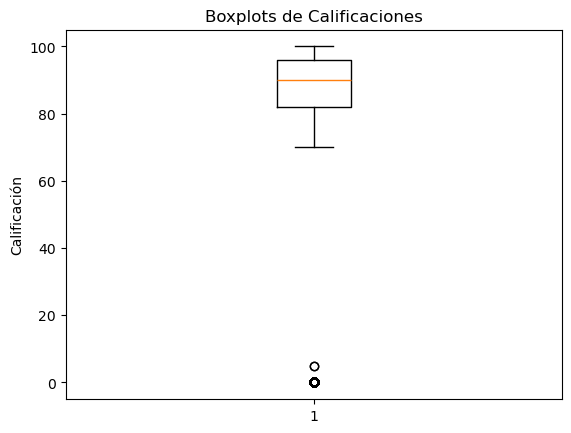

In [20]:
plt.boxplot(school_data["car_Calif"])
plt.ylabel("Calificación") #solo esto pues solo tenemos una variable
plt.title("Boxplots de Calificaciones")

In [42]:
prom_calif=school_data['car_Calif'].mean()
prom_calif

83.1149152892918

In [21]:
school_data.shape

(116042, 25)

In [22]:
school_data.groupby('esp_Nombre').count()

,alu_NumControl,ret_ID,ret_ClaveOficial,car_Calif,Aprueba,car_UltOpcAcred,car_SemXPrime,per_ID_PerXPri,car_AnioXPrime,car_SemXSeg,...,car_AnioXTerc,Periodo,Periodo.1,Unnamed: 18,OPCION DE ACREDITACION,Unnamed: 20,OPCION DE ACREDITACION.1,Unnamed: 22,Unnamed: 23,Unnamed: 24
esp_Nombre,,,,,,,,,,,,,,,,,,,,,
INGENIERIA EN GESTION EMPRESARIAL,26870,26870,26870,26870,26870,26870,26870,26870,26870,26870,...,26870,26870,26870,26870,26870,0,0,0,0,0
INGENIERÍA ELECTRÓNICA,4882,4882,4882,4882,4882,4882,4882,4882,4882,4882,...,4882,4882,4882,4882,4882,0,0,0,0,0
INGENIERÍA EN ANIMACIÓN DIGITAL Y EFECTOS VISUALES,8358,8358,8358,8358,8358,8358,8358,8358,8358,8358,...,8358,8358,8358,8358,8358,0,0,0,0,0
INGENIERÍA EN SISTEMAS COMPUTACIONALES,25117,25117,25117,25117,25117,25117,25117,25117,25117,25117,...,25117,25117,25117,25117,25117,8,8,0,0,1
INGENIERÍA INDUSTRIAL,31962,31962,31962,31962,31962,31962,31962,31962,31962,31962,...,31962,31962,31962,31962,31962,0,0,0,0,0
INGENIERÍA MECATRÓNICA,9303,9303,9303,9303,9303,9303,9303,9303,9303,9303,...,9303,9303,9303,9303,9303,0,0,0,0,0
LICENCIATURA EN ADMINISTRACIÓN,5536,5536,5536,5536,5536,5536,5536,5536,5536,5536,...,5536,5536,5536,5536,5536,0,0,0,0,0
LICENCIATURA EN GASTRONOMIA,4014,4014,4014,4014,4014,4014,4014,4014,4014,4014,...,4014,4014,4014,4014,4014,0,0,0,0,0


In [40]:
school_data.groupby('ret_ClaveOficial').count()

,esp_Nombre,alu_NumControl,ret_ID,car_Calif,Aprueba,car_UltOpcAcred,car_SemXPrime,per_ID_PerXPri,car_AnioXPrime,car_SemXSeg,...,car_AnioXTerc,Periodo,Periodo.1,Unnamed: 18,OPCION DE ACREDITACION,Unnamed: 20,OPCION DE ACREDITACION.1,Unnamed: 22,Unnamed: 23,Unnamed: 24
ret_ClaveOficial,,,,,,,,,,,,,,,,,,,,,
,2328,2328,2328,2328,2328,2328,2328,2328,2328,2328,...,2328,2328,2328,2328,2328,0,0,0,0,0
46E,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,0,0,0,0,0
AC1202,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,0,0,0,0
AC1204,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,0,0,0,0
ACA,76,76,76,76,76,76,76,76,76,76,...,76,76,76,76,76,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SCM0435,155,155,155,155,155,155,155,155,155,155,...,155,155,155,155,155,0,0,0,0,0
SCS0432,153,153,153,153,153,153,153,153,153,153,...,153,153,153,153,153,0,0,0,0,0
SCV0407,240,240,240,240,240,240,240,240,240,240,...,240,240,240,240,240,2,2,0,0,1


In [24]:
table_sem = pd.crosstab(school_data.esp_Nombre, school_data.car_UltOpcAcred)
table_sem

car_UltOpcAcred,0,1,2,3,4,5,6,7,8
esp_Nombre,,,,,,,,,
INGENIERIA EN GESTION EMPRESARIAL,425,23203,2784,0,185,198,75,0,0
INGENIERÍA ELECTRÓNICA,167,2944,1034,449,106,170,10,1,1
INGENIERÍA EN ANIMACIÓN DIGITAL Y EFECTOS VISUALES,0,6265,1392,0,259,331,111,0,0
INGENIERÍA EN SISTEMAS COMPUTACIONALES,639,16930,4960,1334,472,634,135,13,0
INGENIERÍA INDUSTRIAL,1998,24058,4256,433,478,598,131,7,3
INGENIERÍA MECATRÓNICA,182,6861,1673,0,217,290,80,0,0
LICENCIATURA EN ADMINISTRACIÓN,141,4271,610,370,54,76,10,3,1
LICENCIATURA EN GASTRONOMIA,0,3493,257,0,23,236,5,0,0


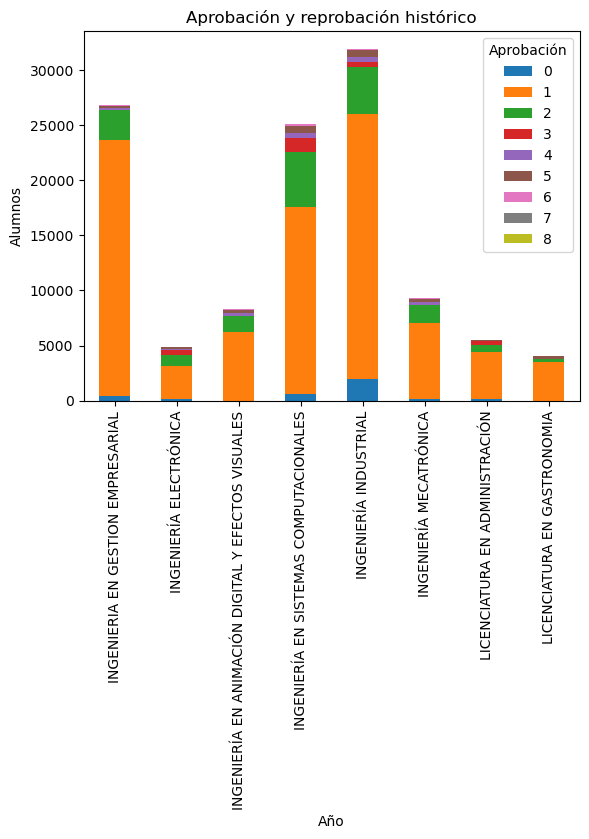

In [25]:
# Graficar la tabla crosstab
table_sem.plot(kind='bar', stacked=True)
plt.xlabel('Año')
plt.ylabel('Alumnos')
plt.title('Aprobación y reprobación histórico')
plt.legend(title='Aprobación', bbox_to_anchor=(1, 1))
plt.show()

In [26]:
table_carr = pd.crosstab(school_data.esp_Nombre, school_data.Aprueba)
table_carr

Aprueba,No,Si
esp_Nombre,,
INGENIERIA EN GESTION EMPRESARIAL,1471,25399
INGENIERÍA ELECTRÓNICA,378,4504
INGENIERÍA EN ANIMACIÓN DIGITAL Y EFECTOS VISUALES,971,7387
INGENIERÍA EN SISTEMAS COMPUTACIONALES,1960,23157
INGENIERÍA INDUSTRIAL,1820,30142
INGENIERÍA MECATRÓNICA,792,8511
LICENCIATURA EN ADMINISTRACIÓN,274,5262
LICENCIATURA EN GASTRONOMIA,405,3609


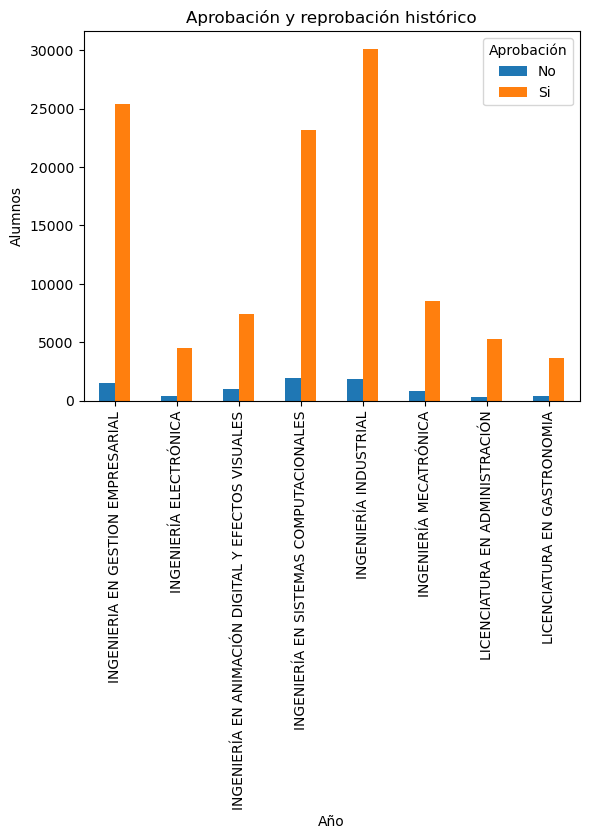

In [43]:
# Graficar la tabla crosstab
table_carr.plot(kind='bar', stacked=False)
plt.xlabel('Año')
plt.ylabel('Alumnos')
plt.title('Aprobación y reprobación histórico')
plt.legend(title='Aprobación', bbox_to_anchor=(1, 1))
plt.show()

In [53]:
# Crosstab de Carrera y aprobación o reprobación de asignaturas en porcentaje
aprXcar=pd.crosstab(school_data['esp_Nombre'],school_data['Aprueba'], normalize='index')*100
aprXcar

Aprueba,No,Si
esp_Nombre,,
INGENIERIA EN GESTION EMPRESARIAL,5.474507,94.525493
INGENIERÍA ELECTRÓNICA,7.742728,92.257272
INGENIERÍA EN ANIMACIÓN DIGITAL Y EFECTOS VISUALES,11.617612,88.382388
INGENIERÍA EN SISTEMAS COMPUTACIONALES,7.803480,92.196520
INGENIERÍA INDUSTRIAL,5.694262,94.305738
INGENIERÍA MECATRÓNICA,8.513383,91.486617
LICENCIATURA EN ADMINISTRACIÓN,4.949422,95.050578
LICENCIATURA EN GASTRONOMIA,10.089686,89.910314


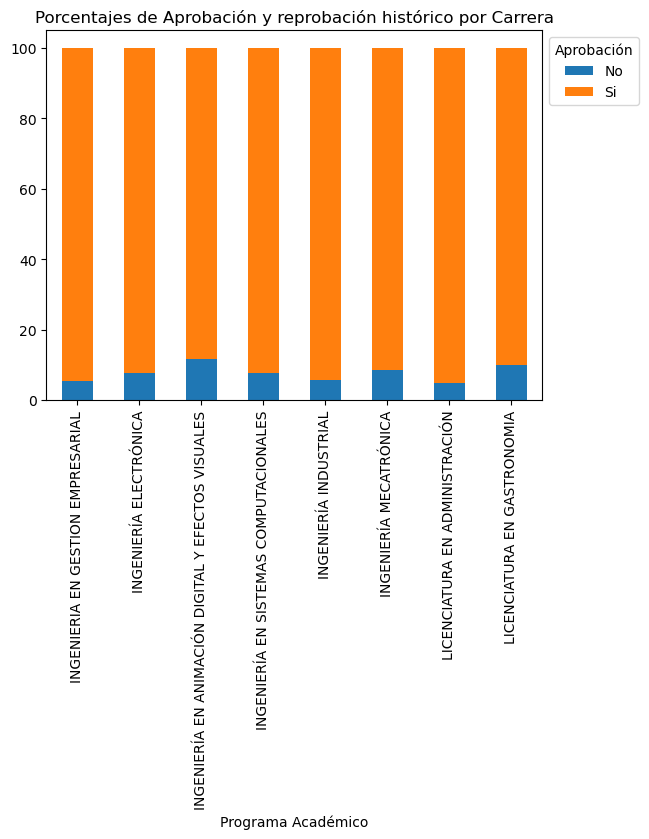

In [55]:
# Graficar la tabla crosstab
aprXcar.plot(kind='bar', stacked=True)
plt.xlabel('Programa Académico')
plt.title('Porcentajes de Aprobación y reprobación histórico por Carrera')
plt.legend(title='Aprobación', bbox_to_anchor=(1, 1))
plt.show()

In [51]:
aprXano=pd.crosstab(school_data['car_AnioXPrime'],school_data['Aprueba'], normalize='index')*100
aprXano

Aprueba,No,Si
car_AnioXPrime,,
2000,0.000000,100.000000
2001,0.000000,100.000000
2002,1.724138,98.275862
2003,0.654664,99.345336
2004,0.394867,99.605133
2005,0.408998,99.591002
2006,2.264493,97.735507
2007,5.121777,94.878223
2008,6.288187,93.711813


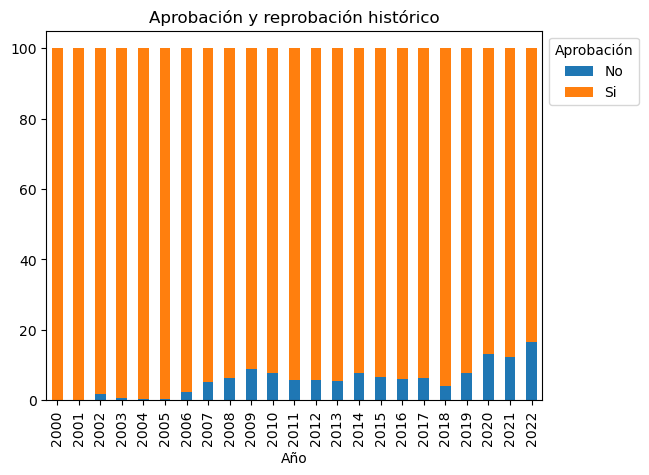

In [52]:
# Graficar la tabla crosstab
aprXano.plot(kind='bar', stacked=True)
plt.xlabel('Año')
plt.title('Aprobación y reprobación histórico')
plt.legend(title='Aprobación', bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
# datos únicos (columna de Número de Control)
len(school_data['alu_NumControl'].unique())

3690

In [38]:
# datos únicos (columna de Claves de Asignatura)
len(school_data['ret_ClaveOficial'].unique())

642

In [ ]:
school_data.isnull().sum()

esp_Nombre                       0
alu_NumControl                   0
ret_ID                           0
ret_ClaveOficial                 0
car_Calif                        0
Calif                            0
car_UltOpcAcred                  0
car_SemXPrime                    0
per_ID_PerXPri                   0
car_AnioXPrime                   0
car_SemXSeg                      0
per_ID_PerXSeg                   0
car_AnioXSeg                     0
car_SemXTerc                     0
per_ID_PerXTerc                  0
car_AnioXTerc                    0
Periodo                          0
Periodo.1                        0
Unnamed: 18                      0
OPCION DE ACREDITACION           0
Unnamed: 20                 116034
OPCION DE ACREDITACION.1    116034
dtype: int64

In [35]:
data.isnull().sum()

esp_Nombre          0
alu_NumControl      0
ret_ClaveOficial    0
car_Calif           0
Aprueba             0
car_AnioXPrime      0
dtype: int64